In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display

from cued_sf2_lab.familiarisation import load_mat_img, plot_image
from cued_sf2_lab.laplacian_pyramid import quantise

from cued_sf2_lab.jpeg import (jpegenc, jpegdec, quant1, quant2, huffenc, huffdflt, huffdes, huffgen)

from cued_sf2_lab.schemes.LBT_chen import LBT
from cued_sf2_lab.schemes.common import calculate_bits
from cued_sf2_lab.schemes.jpegenc_lbt import jpegenc_lbt
from cued_sf2_lab.schemes.jpegdec_lbt import jpegdec_lbt
from cued_sf2_lab.schemes.jpegenc_dwt import jpegenc_dwt
from cued_sf2_lab.schemes.jpegdec_dwt import jpegdec_dwt
from cued_sf2_lab.schemes.common import calculate_ssim

In [2]:
X, _ = load_mat_img('SF2_Competition_Image2022.mat', img_info='X')

In [3]:
Z_comp_day = np.genfromtxt("comp_day_result.csv", delimiter=',')

In [4]:
print(Z_comp_day.shape)

(256, 256)


In [5]:
n=5
vlc, hufftab, dwtstep = jpegenc_dwt(np.copy(X), n, opthuff=True)
Z = jpegdec_dwt(vlc, dwtstep, n, hufftab=hufftab)
print(f"RMS: {np.std(Z - X):.3f}")
print(f"SSIM: {calculate_ssim(Z, X):.3f}")

Forward 5 level DWT
Generating huffcode and ehuf using default tables
Coding rows
Generating huffcode and ehuf using custom tables
Coding rows (second pass)
Bits for coded image = 54451.0
Bits for huffman table = 1424
Generating huffcode and ehuf using custom tables
Decoding rows


/Users/johnbrown/Library/CloudStorage/OneDrive-UniversityofCambridge/Engineering Tripos/Part IIA/Projects/SF2/yc_cued_sf2_lab/cued_sf2_lab/schemes/DWT_chen.py:181: RuntimeWarning: divide by zero encountered in true_divide
  dwtstep_ratios = sqrt_energies[0,N]/sqrt_energies
/Users/johnbrown/Library/CloudStorage/OneDrive-UniversityofCambridge/Engineering Tripos/Part IIA/Projects/SF2/yc_cued_sf2_lab/cued_sf2_lab/schemes/jpegenc_dwt.py:160: UserWarning: DC coefficients too large for desired number of bits
  warnings.warn('DC coefficients too large for desired number of bits')


Inverse quantising using quantdwt
Inverse 5 level DWT

RMS: 6.773
SSIM: 0.910


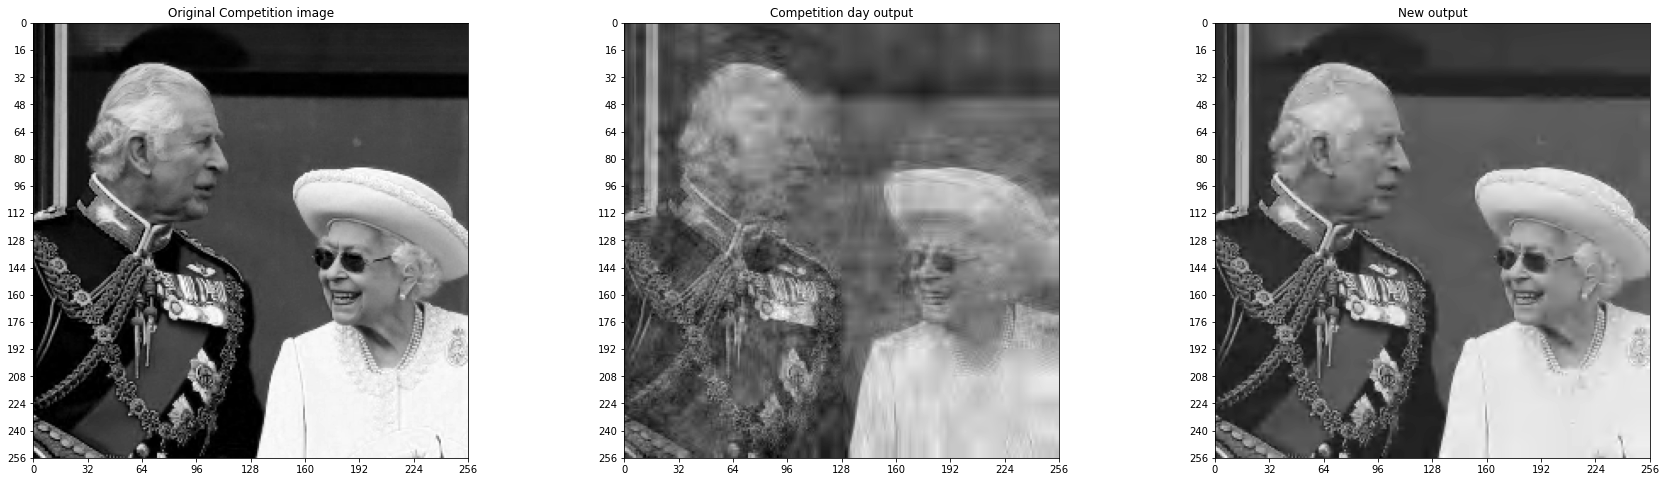

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(30,8))
plot_image(X, ax=axs[0])
axs[0].set(title="Original Competition image")
plot_image(Z_comp_day, ax=axs[1])
axs[1].set(title="Competition day output")
plot_image(Z, ax=axs[2])
axs[2].set(title="New output")
plt.savefig('figures/competition_comparison.png')